<a href="https://colab.research.google.com/github/kasaiannn/HW/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект: анализ факторов, влияющих на суицидальные мысли среди студентов





### 1. Постановка задачи
В данном проекте мы исследуем датасет [Student Depression Dataset](https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/code) о студентах, чтобы выявить факторы, влияющие на наличие суицидальных мыслей. Мы проведем:
- Разведочный анализ данных (EDA) для понимания структуры и распределений.
- Статистический анализ ключевых признаков.
- Построение и оценку моделей для прогнозирования суицидальных мыслей.

### 2. Цели исследования
1. Определить, какие факторы наиболее сильно коррелируют с суицидальными мыслями.
2. Построить модели классификации для прогнозирования риска суицидальных мыслей.
3. Оценить качество моделей и выбрать лучшую.

### 3.Разведочный анализ (EDA)
 - Оценка качества данных
 - Изучение целевой переменной(Have you ever had suicidal thoughts?)
 - Исследование числовых признаков
 - Анализ категориальные признаки
 - Выявление взаимосвязей между переменными
 - Формулирование гипотез



### 4. Построение моделей
Мы используем три алгоритма классификации:
1. Логистическая регрессия  

2. Метод k-ближайших соседей (kNN)  

3. Случайный лес (Random Forest)  
   
### 5. Оценка моделей
- Confusion Matrix (точность, полнота, F1-score).
- ROC-AUC (площадь под кривой ошибок).
- Сравнение моделей по метрикам.

### 6. Предварительные гипотезы исследования
Мы предполагаем, что:
1. **Депрессия (Depression)** и **финансовый стресс (Financial Stress)** — ключевые факторы риска.
2. **Семейная история психических заболеваний (Family History of Mental Illness)** повышает вероятность суицидальных мыслей.
3. **Низкая удовлетворенность учебой/работой** коррелирует с целевой переменной.

### 7. Ожидаемые результаты
1. Выявление наиболее значимых факторов. Определим, какие именно показатели (депрессия, финансовый стресс, рабочие нагрузки и др.) сильнее всего связаны с суицидальными мыслями.

2. Сравнение эффективности моделей.

3. Наглядная визуализация результатов.


Команда: Бухарина Дарья, Касай Анна







In [ ]:
# Импорт библиотек

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Загрузка датасета

df = pd.read_csv('student_depression_dataset.csv')

# Предварительный просмотр данных
print("Первые 5 строк датасета:")
df.head()

Первые 5 строк датасета:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


Датасет содержит следующие признаки:
- id – уникальный идентификатор.
- Gender – пол.
- Age – возраст.
- City – город проживания.
- Profession – профессия.
- Academic Pressure – уровень академической нагрузки.
- Work Pressure – уровень рабочей нагрузки.
- CGPA – средний балл.
- Study Satisfaction – удовлетворенность учебой.
- Job Satisfaction – удовлетворенность работой.
- Sleep Duration – продолжительность сна.
- Dietary Habits – пищевые привычки.
- Degree – уровень образования.
- Have you ever had suicidal thoughts? – целевая переменная (бинарная: Yes/No).
- Work/Study Hours – количество рабочих/учебных часов.
- Financial Stress – уровень финансового стресса.
- Family History of Mental Illness – наличие психических заболеваний в семье.
- Depression – наличие депрессии.



In [ ]:
# Обработка пропущенных значений
print("\nКоличество пропущенных значений:")
print(df.isnull().sum())



Количество пропущенных значений:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


В нашем датасете нет пропущенных значений. Это значительно упрощает подготовку данных для анализа.

In [ ]:
# Проверка дубликатов
print("\nКоличество дубликатов:", df.duplicated().sum())


Количество дубликатов: 0


In [ ]:
print("\nИнформация о датасете:")
df.info()


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 n

-  Мы видим, что переменная **Sleep Duration** имеет нетипичный вид, а именно присутствуют значения 'Less\More than n hours'. Проанализируем данный столбец.


In [ ]:
# Выводим все уникальные значения
print("Уникальные значения в Sleep Duration :")
print(df['Sleep Duration'].unique())

Уникальные значения в Sleep Duration :
["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']


Так как всего 5 различных значений, то логичнее присвоить им порядковый номер.

In [ ]:
# Ordinal encoding (порядковое кодирование)
sleep_ordinal = {
    "'Less than 5 hours'": 1,
    "'5-6 hours'": 2,
    "'7-8 hours'": 3,
    "'More than 8 hours'": 4,
    'Others': 5  # Как отдельная категория
}

df['Sleep Duration Code'] = df['Sleep Duration'].map(sleep_ordinal)


В ходе анализа данных мы обнаружили, что вместо NaN используется ? для переменной **Financial Stress**.

In [ ]:
print("Уникальные значения в Financial Stress до обработки:")
print(df['Financial Stress'].unique())

# Подсчёт количества значений '?' в столбце 'Financial Stress'
count_question_marks = (df['Financial Stress'] == '?').sum()

print(f"Количество людей с '?' в Financial Stress: {count_question_marks}")

Уникальные значения в Financial Stress до обработки:
['1.0' '2.0' '5.0' '3.0' '4.0' '?']
Количество людей с '?' в Financial Stress: 3


Удалим данных людей из списка


In [ ]:
df = df[df['Financial Stress'].str.strip() != '?']
df = df.dropna(subset=['Financial Stress'])


# Проверка
print("Уникальные значения в Financial Stress после обработки:")
print(df['Financial Stress'].unique())

# Подсчёт количества значений '?' в столбце 'Financial Stress'
count_question_marks = (df['Financial Stress'] == '?').sum()
print(f"Количество людей с '?' в Financial Stress: {count_question_marks}")

Уникальные значения в Financial Stress после обработки:
['1.0' '2.0' '5.0' '3.0' '4.0']
Количество людей с '?' в Financial Stress: 0


In [ ]:
print("\nОписательная статистика:")
df.describe(include='all')



Описательная статистика:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep Duration Code
count,27898.000000,27898,27898.000000,27898,27898,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898,27898,27898,27898,27898.000000,27898,27898,27898.000000,27898.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,5,2,NaN,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,'Class 12',Yes,NaN,5.0,No,NaN,NaN
freq,NaN,15546,NaN,1570,27867,NaN,NaN,NaN,NaN,NaN,8309,10316,6080,17656,NaN,6715,14397,NaN,NaN
mean,70442.953402,NaN,25.822174,NaN,NaN,3.141336,0.000430,7.656160,2.943974,0.000681,NaN,NaN,NaN,NaN,7.156570,NaN,NaN,0.585526,2.400710
std,40642.015063,NaN,4.905651,NaN,NaN,1.381462,0.043994,1.470708,1.361122,0.044397,NaN,NaN,NaN,NaN,3.707598,NaN,NaN,0.492640,1.128282
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000
25%,35040.750000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000,1.000000
50%,70689.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000,2.000000
75%,105824.750000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000,3.000000


# **1. Демографические характеристики**

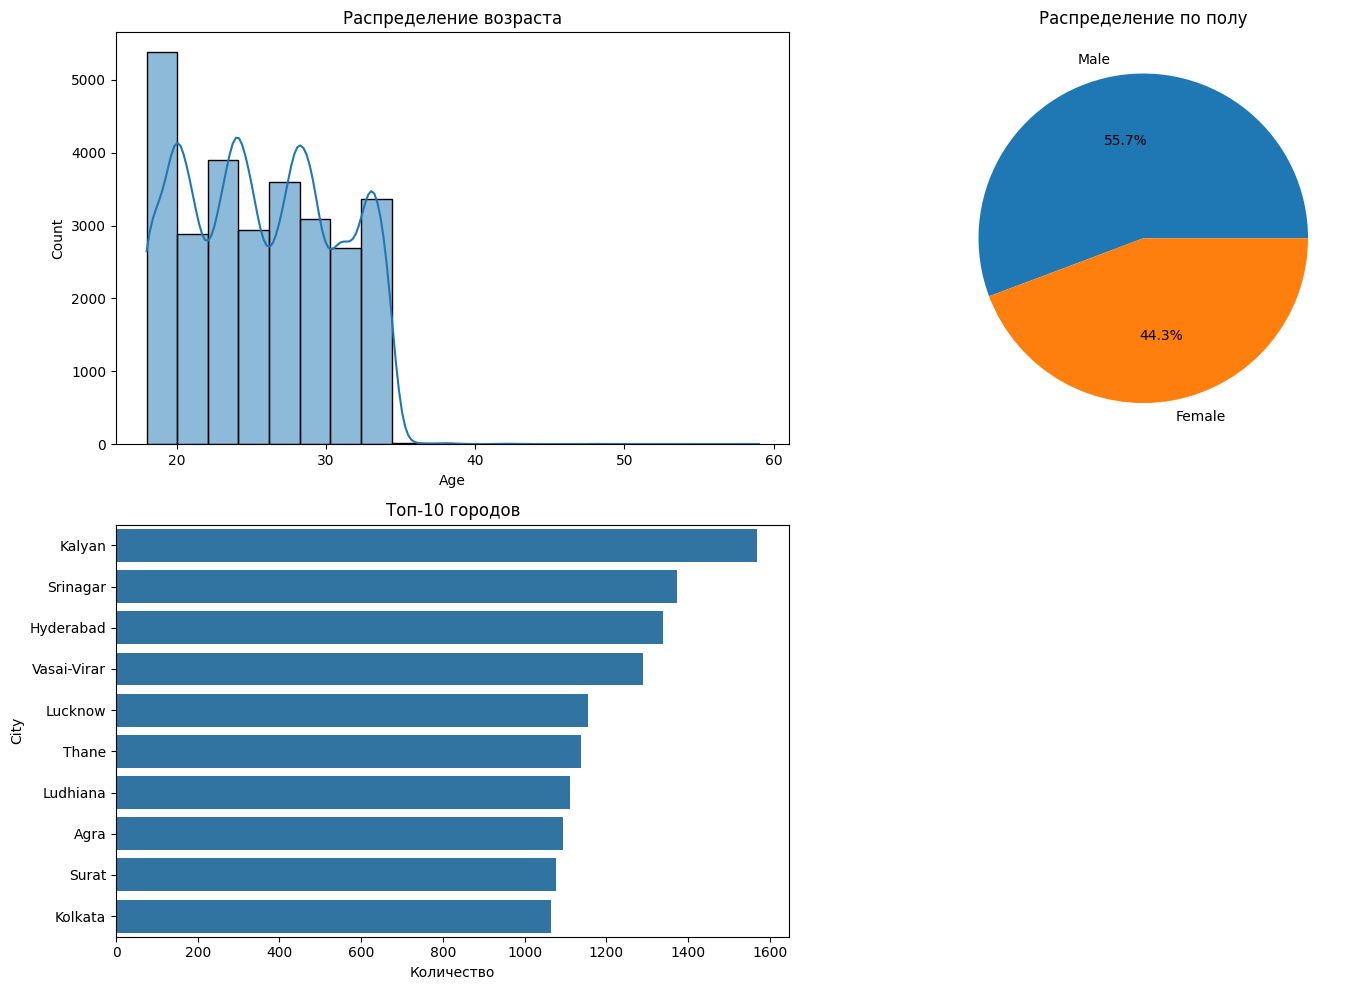

In [ ]:
plt.figure(figsize=(15, 10))

# Возраст
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Распределение возраста')

# Гендер
plt.subplot(2, 2, 2)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Распределение по полу')

# Города (топ-10)
plt.subplot(2, 2, 3)
top_cities = df['City'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Топ-10 городов')
plt.xlabel('Количество')

plt.tight_layout()
plt.show()

# **2. Академические показатели**

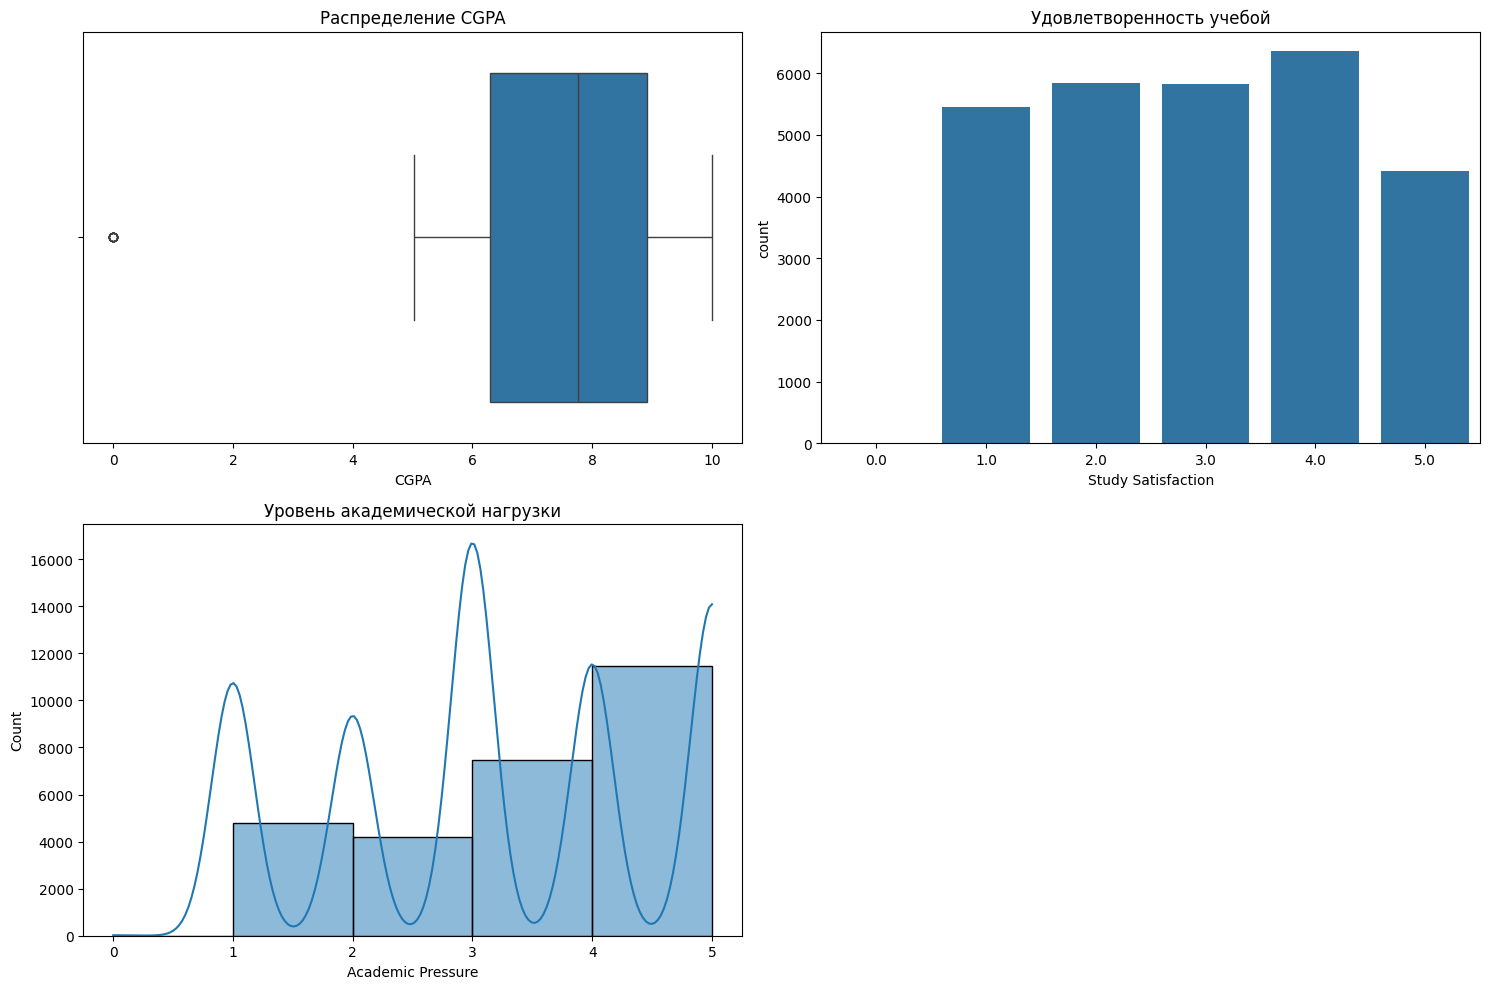

In [ ]:
plt.figure(figsize=(15, 10))
# CGPA
plt.subplot(2, 2, 1)
sns.boxplot(x=df['CGPA'])
plt.title('Распределение CGPA')

# Удовлетворенность учебой
plt.subplot(2, 2, 2)
sns.countplot(x=df['Study Satisfaction'])
plt.title('Удовлетворенность учебой')

# Академическая нагрузка
plt.subplot(2, 2, 3)
sns.histplot(df['Academic Pressure'], bins=5, kde=True)
plt.title('Уровень академической нагрузки')

plt.tight_layout()
plt.show()

# **3. Психическое здоровье**

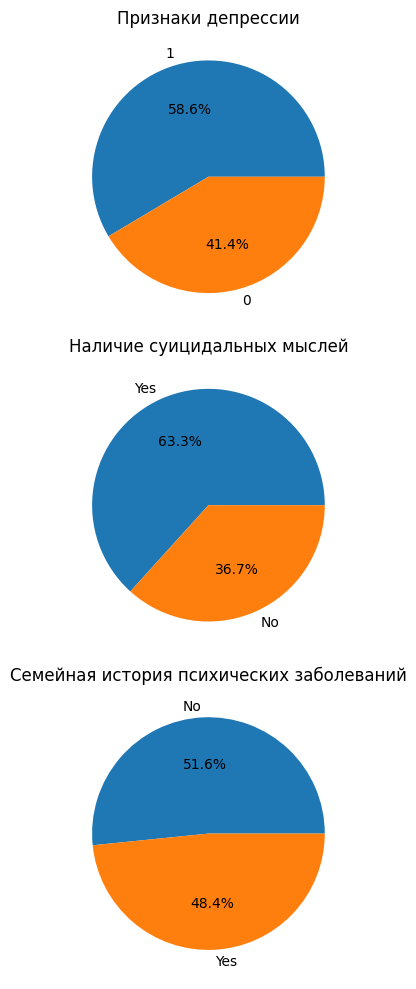

In [ ]:
plt.figure(figsize=(15, 10))

# Депрессия
plt.subplot(3, 1, 1)
suicide_counts = df['Depression'].value_counts()
plt.pie(suicide_counts, labels=suicide_counts.index, autopct='%1.1f%%')
plt.title('Признаки депрессии')


# Суицидальные мысли
plt.subplot(3, 1, 2)
suicide_counts = df['Have you ever had suicidal thoughts ?'].value_counts()
plt.pie(suicide_counts, labels=suicide_counts.index, autopct='%1.1f%%')
plt.title('Наличие суицидальных мыслей')



# Семейная история
plt.subplot(3, 1, 3)
family_counts = df['Family History of Mental Illness'].value_counts()
plt.pie(family_counts, labels=family_counts.index, autopct='%1.1f%%')
plt.title('Семейная история психических заболеваний')

plt.tight_layout()
plt.show()

# **4. Образ жизни**

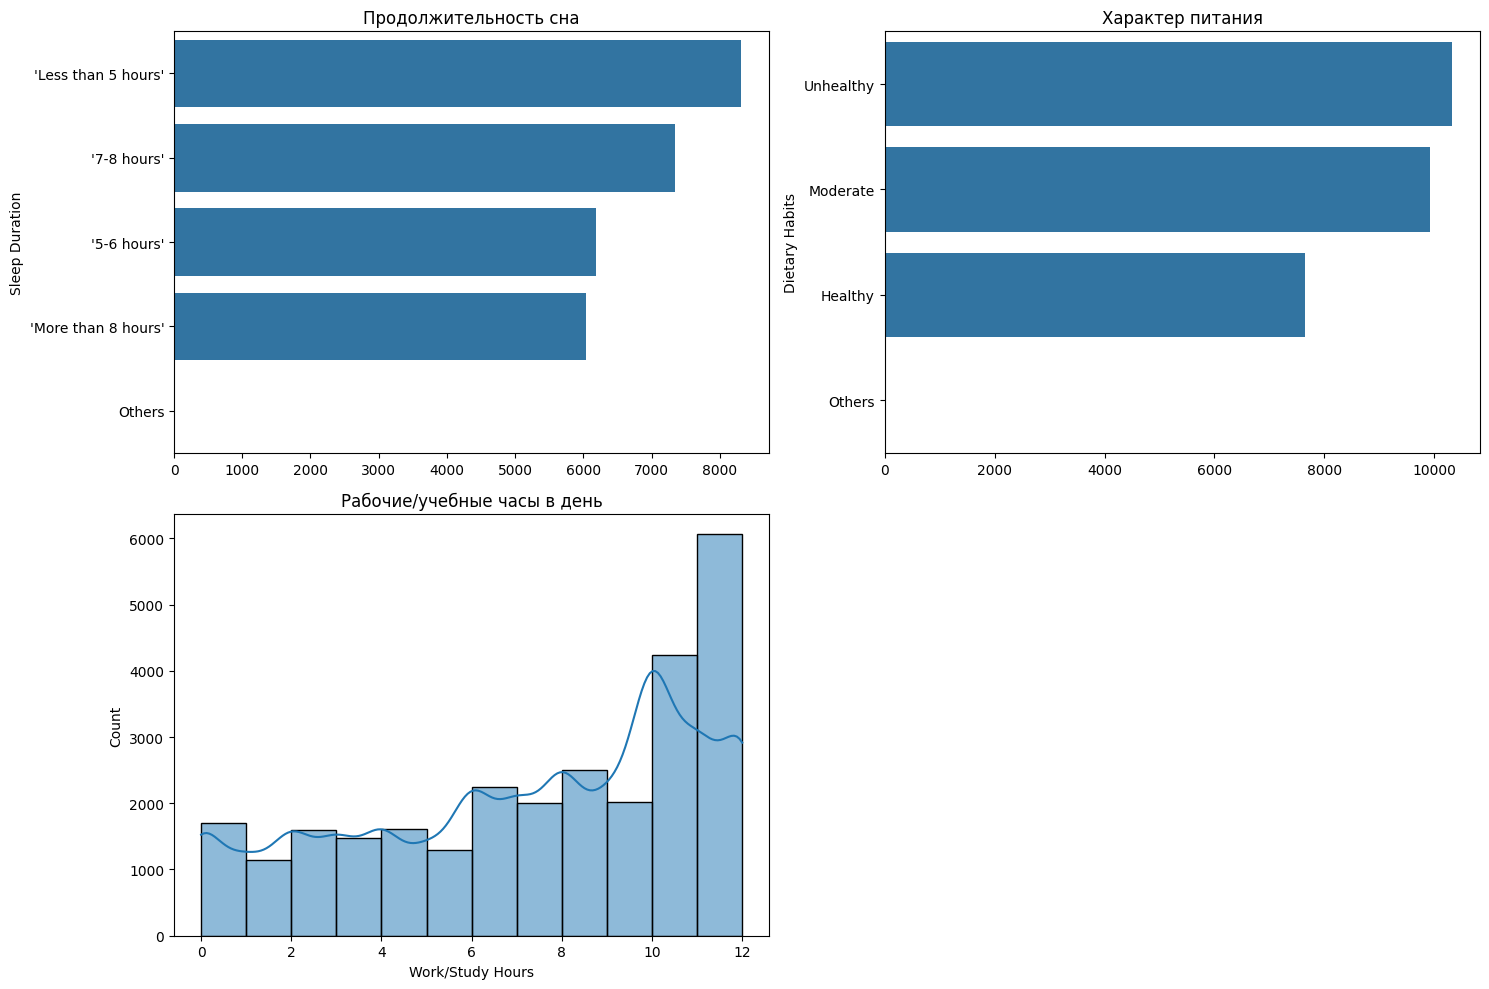

In [ ]:
plt.figure(figsize=(15, 10))

# Продолжительность сна
plt.subplot(2, 2, 1)
sleep_counts = df['Sleep Duration'].value_counts()
sns.barplot(x=sleep_counts.values, y=sleep_counts.index)
plt.title('Продолжительность сна')

# Питание
plt.subplot(2, 2, 2)
diet_counts = df['Dietary Habits'].value_counts()
sns.barplot(x=diet_counts.values, y=diet_counts.index)
plt.title('Характер питания')

# Рабочие/учебные часы
plt.subplot(2, 2, 3)
sns.histplot(df['Work/Study Hours'], bins=12, kde=True)
plt.title('Рабочие/учебные часы в день')

plt.tight_layout()
plt.show()

# **5. Финансовый стресс**

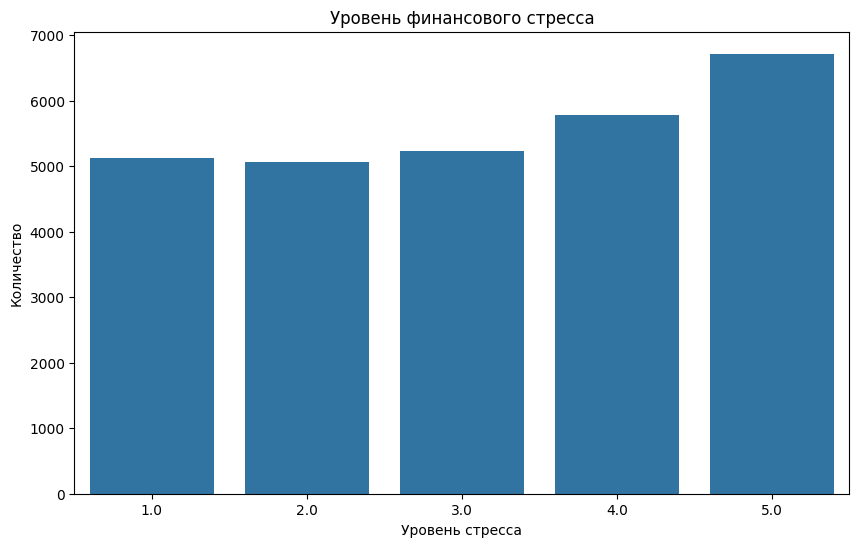

In [ ]:
plt.figure(figsize=(10, 6))
stress_counts = df['Financial Stress'].value_counts().sort_index()
sns.barplot(x=stress_counts.index, y=stress_counts.values)
plt.title('Уровень финансового стресса')
plt.xlabel('Уровень стресса')
plt.ylabel('Количество')
plt.show()

# **Матрица корреляции**

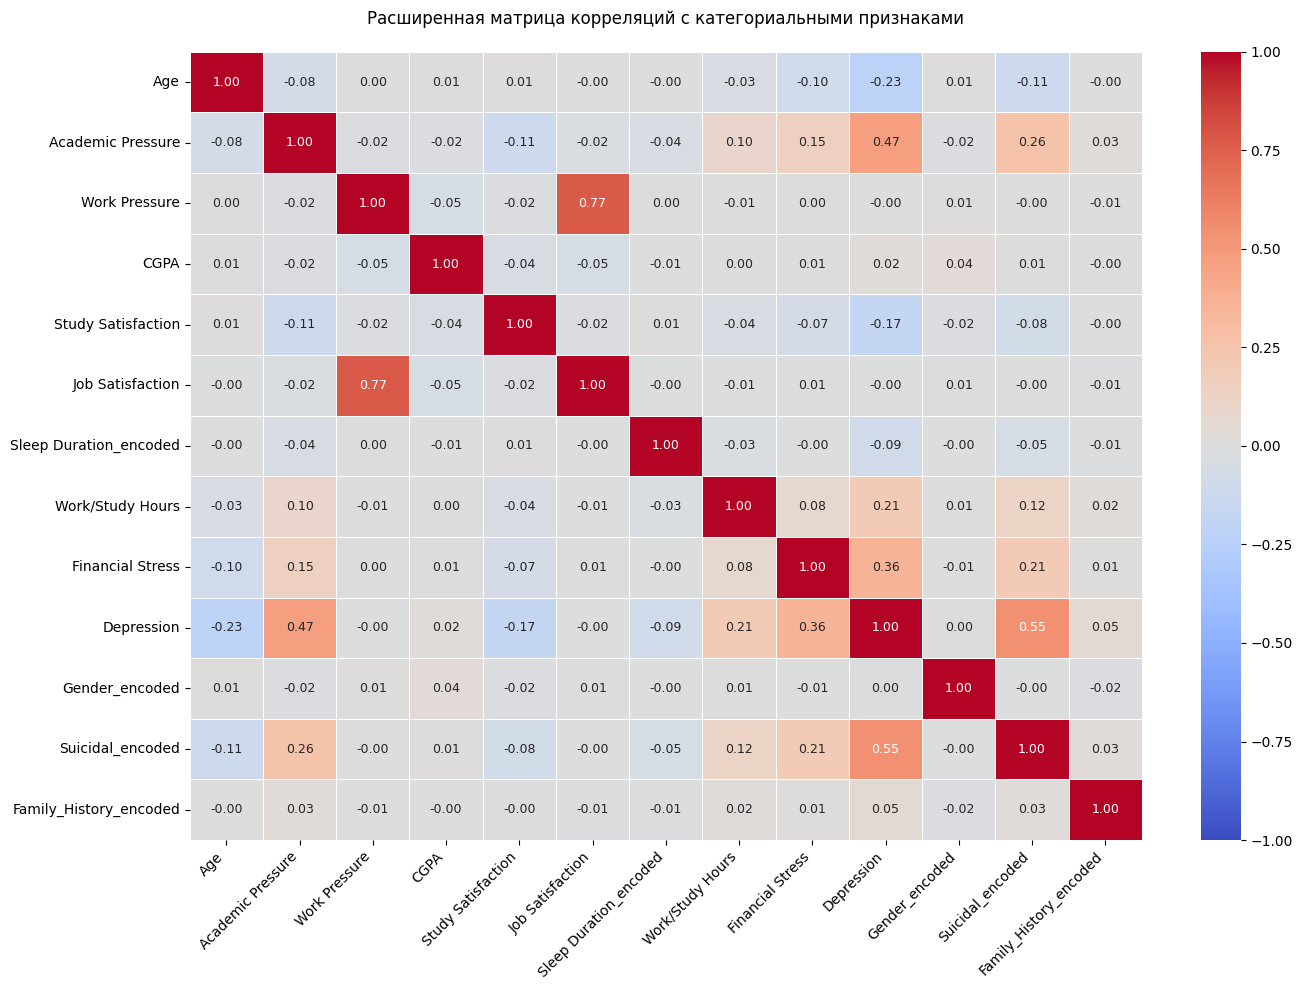

In [ ]:
# Создаем копию данных для преобразований
df_corr = df.copy()

# Кодируем категориальные признаки
gender_map = {'Male': 1, 'Female': 0}
df_corr['Gender_encoded'] = df_corr['Gender'].map(gender_map)

suicidal_map = {'Yes': 1, 'No': 0}
df_corr['Suicidal_encoded'] = df_corr['Have you ever had suicidal thoughts ?'].map(suicidal_map)

# Кодирование истории психических заболеваний в семье
family_history_map = {'Yes': 1, 'No': 0}
df_corr['Family_History_encoded'] = df_corr['Family History of Mental Illness'].map(family_history_map)

# Уже закодированный Sleep Duration (как мы делали ранее)
sleep_map = {
    "'Less than 5 hours'": 1,
    "'5-6 hours'": 2,
    "'7-8 hours'": 3,
    "'More than 8 hours'": 4,
    'Others': 5
}
df_corr['Sleep Duration_encoded'] = df_corr['Sleep Duration'].map(sleep_map)

# Собираем все числовые и закодированные признаки
features_for_corr = [
    'Age',
    'Academic Pressure',
    'Work Pressure',
    'CGPA',
    'Study Satisfaction',
    'Job Satisfaction',
    'Sleep Duration_encoded',
    'Work/Study Hours',
    'Financial Stress',
    'Depression',
    'Gender_encoded',
    'Suicidal_encoded',
    'Family_History_encoded'
]

# Строим матрицу корреляций
plt.figure(figsize=(14, 10))
corr_matrix = df_corr[features_for_corr].corr()

# Улучшенная визуализация
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            vmin=-1,
            vmax=1,
            linewidths=0.5,
            annot_kws={'size': 9})

# Настраиваем подписи
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Расширенная матрица корреляций с категориальными признаками', pad=20)
plt.tight_layout()
plt.show()

# **Подготовка данных для моделирования**

In [ ]:
# 2. Отбор признаков на основе корреляционного анализа
selected_features = [
    'Depression',           # Сильная корреляция (0.55)
    'Financial Stress',     # Умеренная корреляция (0.21)
    'Academic Pressure',    # Умеренная корреляция (0.26)
    'Work/Study Hours',     # Слабая корреляция (0.12)
    'Age',                  # Слабая отрицательная корреляция (-0.11)
]

# 3. Подготовка данных для модели
X = df_corr[selected_features]
y = df_corr['Suicidal_encoded']

# 4. Разделение данных на train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Стратификация для сохранения баланса классов
)

# 5. Стандартизация числовых признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Важно использовать transform, а не fit_transform!

# 6. Сохранение названий признаков после масштабирования
feature_names = selected_features
X_train_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_df = pd.DataFrame(X_test_scaled, columns=feature_names)

# Вывод информации о подготовленных данных
print("\nФорма обучающих данных:", X_train_scaled.shape)
print("Форма тестовых данных:", X_test_scaled.shape)
print("\nПример масштабированных данных:")
print(X_train_df.head())
print("\nРаспределение целевой переменной в train/test:")
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


Форма обучающих данных: (22318, 5)
Форма тестовых данных: (5580, 5)

Пример масштабированных данных:
   Depression  Financial Stress  Academic Pressure  Work/Study Hours       Age
0    0.842029          1.293183          -0.821984         -0.854595  0.651642
1    0.842029         -0.098694          -1.546654         -0.046001 -0.571087
2   -1.187607          0.597245          -1.546654          0.762593  1.670583
3    0.842029          0.597245           1.352028         -0.585063 -0.774876
4   -1.187607         -1.490570          -1.546654          0.762593 -0.978664

Распределение целевой переменной в train/test:
Suicidal_encoded
1    0.632897
0    0.367103
Name: proportion, dtype: float64
Suicidal_encoded
1    0.632796
0    0.367204
Name: proportion, dtype: float64


# **Построение и оценка моделей**

1. **Логистическая регрессия**

Логистическая регрессия:
              precision    recall  f1-score   support

           0       0.68      0.77      0.73      2049
           1       0.86      0.79      0.82      3531

    accuracy                           0.79      5580
   macro avg       0.77      0.78      0.77      5580
weighted avg       0.79      0.79      0.79      5580

ROC-AUC: 0.786


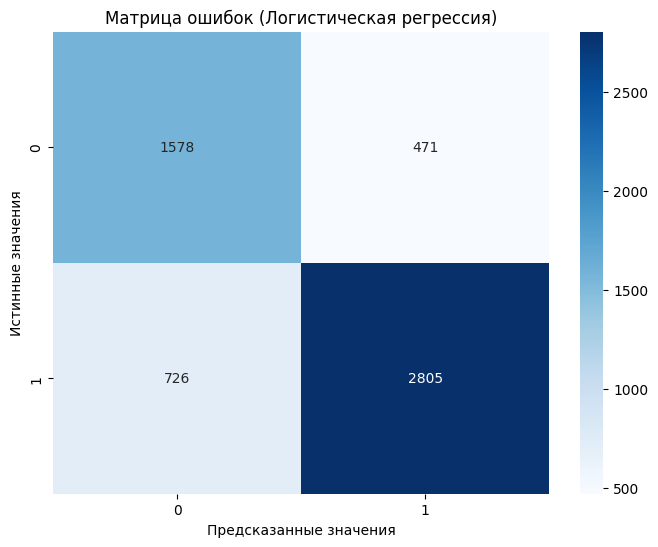

In [ ]:
# Инициализация и обучение модели
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Предсказание и оценка
y_pred_log = log_reg.predict(X_test_scaled)
y_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]

# Метрики
print("Логистическая регрессия:")
print(classification_report(y_test, y_pred_log))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_log):.3f}")

# Матрица ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок (Логистическая регрессия)')
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.show()

**Основные метрики:**

- Accuracy: 79%
- Precision (класс 1): 86%
- Recall (класс 1): 79%
- F1-score (класс 1): 82%

ROC-AUC: 0.786

**Сильные стороны:**

1. Хорошая точность (Precision = 0.86) – из всех предсказанных "суициальных мыслей" 86% верны.

2. Умеренная полнота (Recall = 0.79) – модель выявляет 79% реальных случаев.

3. F1-score (0.82) показывает сбалансированность между точностью и полнотой.

**Проблемы:**

1. 21% опасных случаев (класс 1) пропущено (False Negatives).

2. 23% ложных тревог (False Positives) для класса 0.

3. ROC-AUC (0.788) указывает на ограниченную способность разделять классы.

**Вывод**: Логистическая регрессия показала  хорошее качество, но для серьезных задач (например, медицинской диагностики) требует доработки.
Подходит для базового скрининга, но не для окончательных решений.

2. **Метод k-ближайших соседей (kNN)**

Оптимальное количество соседей: 23
Лучший ROC-AUC: 0.778

Отчет классификации:
              precision    recall  f1-score   support

           0       0.69      0.75      0.71      2049
           1       0.84      0.80      0.82      3531

    accuracy                           0.78      5580
   macro avg       0.77      0.77      0.77      5580
weighted avg       0.79      0.78      0.78      5580



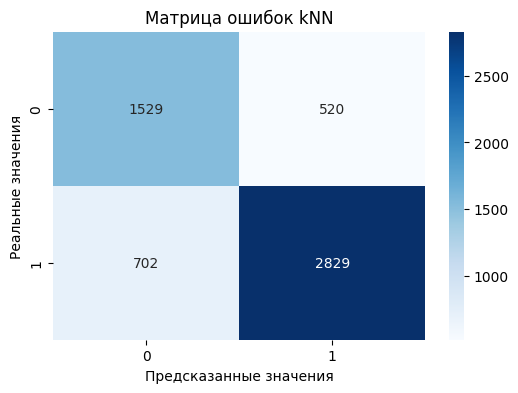

ROC-AUC на тестовых данных: 0.780


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Создаем сетку параметров
param_grid = {'n_neighbors': np.arange(1, 30)}
knn = KNeighborsClassifier()
# Настраиваем поиск по сетке с кросс-валидацией (5 фолдов по умолчанию)
knn_rscv = RandomizedSearchCV(knn, param_grid, n_iter=10, cv=5, scoring='roc_auc', random_state=42)
knn_rscv.fit(X_train_scaled, y_train)
# Лучшее значение k
best_k = knn_rscv.best_params_['n_neighbors']
print(f"Оптимальное количество соседей: {best_k}")

# Лучшая оценка ROC-AUC
print(f"Лучший ROC-AUC: {knn_rscv.best_score_:.3f}")

# Создаем финальную модель с лучшим k
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

# Предсказания на тестовых данных
y_pred_knn = final_knn.predict(X_test_scaled)
y_proba_knn = final_knn.predict_proba(X_test_scaled)[:, 1]

# 1. Отчет классификации
print("\nОтчет классификации:")
print(classification_report(y_test, y_pred_knn,
                           target_names=['0', '1']))

# 2. Матрица ошибок
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.title('Матрица ошибок kNN')
plt.xlabel('Предсказанные значения')
plt.ylabel('Реальные значения')
plt.show()


# 3. ROC-AUC на тестовых данных
test_roc_auc = roc_auc_score(y_test, y_proba_knn)
print(f"ROC-AUC на тестовых данных: {test_roc_auc:.3f}")

**Основные метрики:**
- Accuracy: 78%
- Precision (класс 1): 84%
- Recall (класс 1): 80%
- F1-score (класс 1): 82%

ROC-AUC: 0.780

**Сильные стороны модели:**

1. Хорошая точность (Precision = 0.84) для класса 1: из всех предсказанных случаев с суицидальными мыслями 84% были верными.
2. Умеренно высокий Recall (0.80): модель выявляет 80% реальных случаев суицидальных мыслей.
3. Сбалансированность: F1-score (0.82) показывает хороший компромисс между точностью и полнотой.

**Проблемы:**
1. 20% опасных случаев пропущено (False Negatives) — каждый пятый случай суицидальных мыслей не выявлен.

2. 26% ложных тревог (False Positives) для класса 0 — модель ошибочно приписывает суицидальные мысли тем, у кого их нет.

3. ROC-AUC (0.780) указывает на ограниченную способность четко разделять классы.

**Вывод:** Модель k-NN с k=23 демонстрирует удовлетворительное, но не идеальное качество. Она пригодна для предварительного скрининга, но требует доработок для снижения доли пропущенных случаев (False Negatives).

3. **Случайный лес (Random Forest)**

Начинаем подбор параметров...


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the 

Подбор завершен!

Оценка на тестовых данных:
              precision    recall  f1-score   support

           0       0.68      0.77      0.73      2049
           1       0.86      0.79      0.82      3531

    accuracy                           0.79      5580
   macro avg       0.77      0.78      0.77      5580
weighted avg       0.79      0.79      0.79      5580



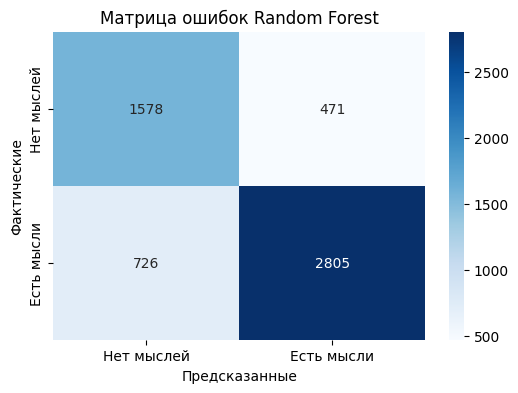

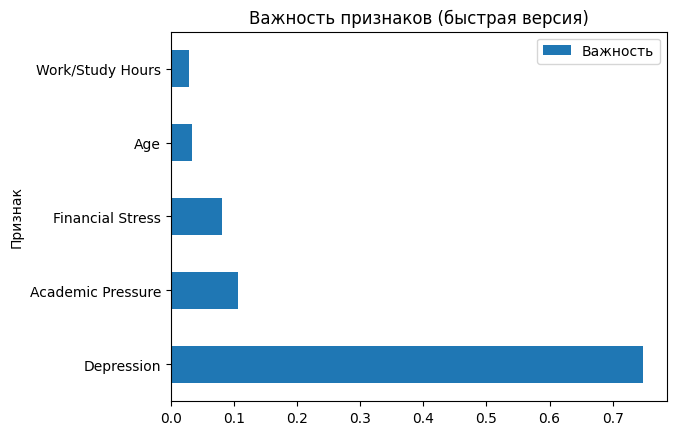

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sample_size = 5000
X_train_sample = X_train_scaled[:sample_size]
y_train_sample = y_train[:sample_size]

rf = RandomForestClassifier(
    class_weight='balanced_subsample',
    random_state=42,
    n_jobs=2,
    warm_start=True
)

param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10]
}

# Поиск параметров
rf_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=3,
    cv=3,
    scoring='roc_auc',
    n_jobs=1,
    random_state=42
)

print("Начинаем подбор параметров...")
rf_search.fit(X_train_sample, y_train_sample)
print("Подбор завершен!")

# Лучшая модель
best_rf = rf_search.best_estimator_

# Предсказания на тестовых данных
print("\nОценка на тестовых данных:")
y_pred = best_rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
# Матрица ошибок
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Нет мыслей', 'Есть мысли'],
                yticklabels=['Нет мыслей', 'Есть мысли'])
    plt.title('Матрица ошибок Random Forest')
    plt.xlabel('Предсказанные')
    plt.ylabel('Фактические')
    plt.show()

plot_confusion_matrix(y_test, y_pred)


# Визуализация важности признаков
pd.DataFrame({
    'Признак': selected_features,
    'Важность': best_rf.feature_importances_
}).sort_values('Важность', ascending=False).plot.barh(x='Признак', y='Важность')
plt.title('Важность признаков (быстрая версия)')
plt.show()

**Основные метрики:**

- Accuracy (Общая точность): 79%
- Precision (Точность) для класса 1: 86%
- Recall (Полнота) для класса 1: 79%
- F1-score для класса 1: 82%

ROC-AUC: 0.755

**Сильные стороны:**

1. Хорошая полнота (Recall = 0.79) - модель выявляет большинство реальных случаев (79%) суицидальных мыслей, что критично для скрининга.

2. Сбалансированный F1-score (0.82) - показывает, что модель не жертвует точностью ради полноты и наоборот.

3. Приемлемая точность (Precision = 0.86) - из всех предсказанных "положительных" случаев 86% верны.

**Проблемы:**

1. 32% студентов без риска ошибочно помечены как "группа риска".

2. 23% реально "здоровых" студентов не распознаны. Причина: Дисбаланс классов (63% класса 1 vs 37% класса 0).

3. ROC-AUC (0.755) указывает на ограниченную способность разделять классы.
**Вывод**: Модель требует доработок, но может использоваться для предварительной оценки рисков.

**Сравнение моделей**

In [ ]:
# Список моделей и их предсказаний
models = {
    "Logistic Regression": (y_pred_log, y_proba_log),
    "kNN (k=23)": (y_pred_knn, y_proba_knn),
    "Random Forest": (y_pred_rf, y_proba_rf)
}

# Сравнение метрик
results = []
for name, (y_pred, y_proba) in models.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_proba)
    results.append({
        "Model": name,
        "Accuracy": report["accuracy"],
        "Precision_0": report["0"]["precision"],
        "Recall_0": report["0"]["recall"],
        "F1_0": report["0"]["f1-score"],
        "Precision_1": report["1"]["precision"],
        "Recall_1": report["1"]["recall"],
        "F1_1": report["1"]["f1-score"],
        "ROC-AUC": roc_auc
    })

# Результаты в таблице
pd.DataFrame(results).set_index("Model").round(3)

,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1,ROC-AUC
Model,,,,,,,,
Logistic Regression,0.785,0.685,0.770,0.725,0.856,0.794,0.824,0.786
kNN (k=23),0.781,0.685,0.746,0.714,0.845,0.801,0.822,0.780
Random Forest,0.741,0.657,0.618,0.637,0.786,0.813,0.799,0.755


1. **Логистическая регрессия**:

- Лучшая точность (0.79) и ROC-AUC (0.786)

- Оптимальный баланс метрик:

  - Высокая точность для класса 1 (0.86) — минимум ложных тревог.

  - Хороший Recall для обоих классов (0.77 и 0.79).

- Недостаток: 21% пропущенных случаев (False Negatives) для класса 1.

2. **Метод k-ближайших соседей**:

- Близок к логистической регрессии по большинству метрик.

- Слабее в точности (0.84 vs 0.86) для класса 1.

- Требует хранения всех данных — неэффективно для продакшена.

3. **Random Forest**:

- Худшие показатели, кроме Recall.

- Низкий ROC-AUC (0.755) — хуже разделяет классы.

- 32% ложных тревог для класса 0 (Precision=0.68).